# Task Deep Learning: Image Classification

More about the cat and what am I going to do

In [2]:
!pip install bs4
!pip install selenium
!pip install requests
!pip install lxml
!pip install split-folders
!pip install seaborn


[notice] A new release of pip available: 22.3 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)



[notice] A new release of pip available: 22.3 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from bs4 import BeautifulSoup
from selenium import webdriver
import requests
import time
import os
import splitfolders
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import keras.utils as np_utils
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.utils import image_dataset_from_directory
from keras.callbacks import ModelCheckpoint




## Scrape my own dataset

Why these cat? where images? what wrong what easy
I was in the AI orientation project and we used a webscraper for getting different colors. I will use the same web scraper to get images of turtles, dolphins, jellyfish, sea stars and clownfish. Ofcourse, I had to change a few things and I also added comments.
-> 30 img in test and 120 in train

In [ ]:
#look for these words on google:
my_keywords = ["sea+turtle","dolphin","jelly+fish","asteroidea","amphiprioninae"]

#get the url of the images after using google to get the results for the keywords
def get_img_urls(keyword):
    #use the driver to interact with a web browser
    driver = webdriver.Chrome()
    #for images: tbm=isch
    driver.get(f"https://www.google.com/search?q={keyword}&tbm=isch")
    #go over the page for 10 times to look for more content
    for i in range(10):
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
        time.sleep(1.0)
    soup = BeautifulSoup(driver.page_source, 'lxml')
    driver.quit()
    #find all img tags in the page source
    img_tags = soup.findAll('img', class_='rg_i Q4LuWd')
    img_urls = []
    #get all the data-src attributes of the img and add that in the list
    for img_tag in img_tags:
        if img_tag.has_attr('data-src'):
            img_urls.append(img_tag['data-src'])
    return list(img_urls)

#download the image and save to the file system
def download_image(url, keyword, index):
    response = requests.get(url)
    file = open(f"./{keyword}/{index+1}.jpg", "wb")
    file.write(response.content)
    file.close()

#this will make a directory with the specified name if it doesn't exist
def make_keyword_dir(keyword):
    cwd = os.getcwd()
    dir = os.path.join(cwd, keyword)
    if not os.path.exists(dir):
        os.mkdir(dir)

#for each keyword it will make a directory with that name of the keyword
#it gets the urls related to that keyword
#goes through the 250 images and will download it
for keyword in my_keywords:
    make_keyword_dir(keyword)
    img_urls = get_img_urls(keyword)
    for i in range(min(200,len(img_urls))):
        download_image(img_urls[i], keyword, i)




In [ ]:

# Define the input and output directories
input_folder = './'
output_folder = './datasets'

# Split the images into 80% training and 20% testing sets
splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(0.8, 0.2))


Copying files: 10 files [00:00, 34.58 files/s]


## EDA and preparing the data

In [7]:
dataset_train_dir = '/content/drive/MyDrive/TaskDL/datasets/train'

classes_tr = os.listdir(dataset_train_dir)
for class_tr in classes_tr:
    class_path = os.path.join(dataset_train_dir, class_tr)
    num_images = len(os.listdir(class_path))
    print(f"Training: {class_tr} class, Number of Images: {num_images}")


print("\n")


dataset_test_dir = '/content/drive/MyDrive/TaskDL/datasets/test'

classes_te = os.listdir(dataset_test_dir)
for class_te in classes_te:
    class_path = os.path.join(dataset_test_dir, class_te)
    num_images = len(os.listdir(class_path))
    print(f"Test: {class_te} class, Number of Images: {num_images}")


Training: amphiprioninae class, Number of Images: 120
Training: dolphin class, Number of Images: 120
Training: jelly+fish class, Number of Images: 120
Training: sea+turtle class, Number of Images: 120
Training: asteroidea class, Number of Images: 120


Test: dolphin class, Number of Images: 30
Test: jelly+fish class, Number of Images: 30
Test: sea+turtle class, Number of Images: 30
Test: amphiprioninae class, Number of Images: 30
Test: asteroidea class, Number of Images: 30


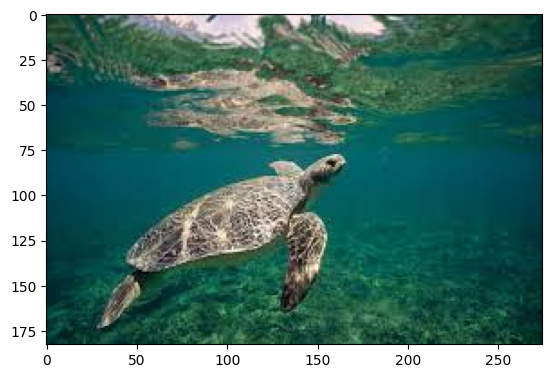

In [8]:
image_path = '/content/drive/MyDrive/TaskDL/datasets/train/sea+turtle/2.jpg'

#load and display the image
img = image.load_img(image_path)
plt.imshow(img)
plt.show()

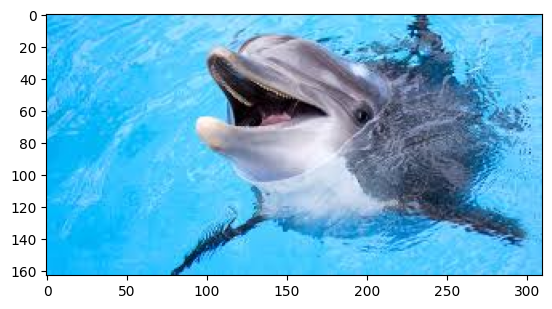

In [9]:
image_path = '/content/drive/MyDrive/TaskDL/datasets/test/dolphin/172.jpg'

#load and display the image
img = image.load_img(image_path)
plt.imshow(img)
plt.show()

In [10]:
train_val_datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_val_datagen.flow_from_directory('/content/drive/MyDrive/TaskDL/datasets/train',
                                                 subset='training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = train_val_datagen.flow_from_directory('/content/drive/MyDrive/TaskDL/datasets/train',
                                                 subset='validation',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/TaskDL/datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 480 images belonging to 5 classes.
Found 120 images belonging to 5 classes.
Found 150 images belonging to 5 classes.


So, 480 images in the training set, 120 images in the validation set and 150 in the test set.

Data loading went good...

## CNN network

In [22]:
#initialize the CNN
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(activation='relu', units=128))
model.add(Dropout(0.2))

model.add(Dense(activation='softmax', units=5))

In [23]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 54, 54, 64)       

In [27]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/TaskDL/saved_models/checkpoints2/weights_{epoch:02d}.tf", save_weights_only=True, save_freq="epoch")


In [28]:
history = model.fit(training_set,
                validation_data = validation_set,
                batch_size = 64,
                epochs = 15,
                callbacks=[checkpoint]
                )

Epoch 1/15
15/15 [==============================] - 10s 672ms/step - loss: 2.4076 - accuracy: 0.2729 - val_loss: 1.5219 - val_accuracy: 0.2417
Epoch 2/15
15/15 [==============================] - 10s 689ms/step - loss: 1.4382 - accuracy: 0.3979 - val_loss: 1.3449 - val_accuracy: 0.4833
Epoch 3/15
15/15 [==============================] - 9s 614ms/step - loss: 1.2508 - accuracy: 0.4979 - val_loss: 1.2238 - val_accuracy: 0.5167
Epoch 4/15
15/15 [==============================] - 9s 590ms/step - loss: 1.0965 - accuracy: 0.6042 - val_loss: 1.1742 - val_accuracy: 0.5750
Epoch 5/15
15/15 [==============================] - 10s 645ms/step - loss: 1.0551 - accuracy: 0.5813 - val_loss: 1.1432 - val_accuracy: 0.5917
Epoch 6/15
15/15 [==============================] - 10s 666ms/step - loss: 1.0170 - accuracy: 0.6438 - val_loss: 1.1525 - val_accuracy: 0.5667
Epoch 7/15
15/15 [==============================] - 11s 717ms/step - loss: 0.9507 - accuracy: 0.6396 - val_loss: 1.1605 - val_accuracy: 0.5417
E

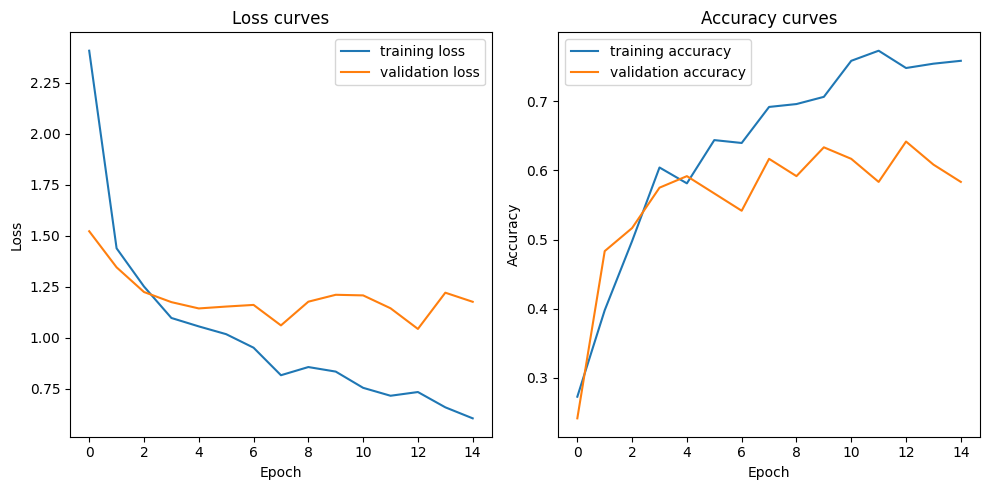

In [29]:
# Create a figure and a grid of subplots with a single call
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Plot the loss curves on the first subplot
ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='validation loss')
ax1.set_title('Loss curves')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the accuracy curves on the second subplot
ax2.plot(history.history['accuracy'], label='training accuracy')
ax2.plot(history.history['val_accuracy'], label='validation accuracy')
ax2.set_title('Accuracy curves')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

In [31]:
model.load_weights("/content/drive/MyDrive/TaskDL/saved_models/checkpoints2/weights_07.tf")

In [32]:
test_loss, test_acc = model.evaluate(test_set)
print(test_acc)

5/5 [==============================] - 52s 13s/step - loss: 1.0805 - accuracy: 0.6200
0.6200000047683716


In [33]:
print(test_loss)

1.080488681793213


In [34]:
#confusion matrix
y_true = test_set.classes
y_pred = model.predict(test_set)
y_pred = y_pred.argmax(axis=1)
cm = confusion_matrix(y_true, y_pred)

print(cm)


5/5 [==============================] - 1s 173ms/step
[[ 2 11  8  2  7]
 [ 4  6  8  9  3]
 [ 6 11  9  0  4]
 [ 3  6  7  7  7]
 [ 4 11  2  4  9]]


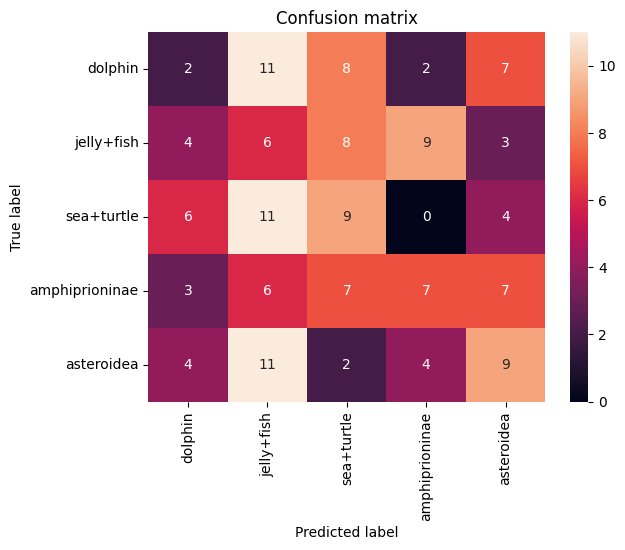

In [40]:
sns.heatmap(cm, annot=True, xticklabels=os.listdir(dataset_test_dir), yticklabels=os.listdir(dataset_test_dir))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

### Google:

<img src="./confusionGoogle.png"  style="height: 600px"/>

### GenAI:

Question: I want a folder with randomly selected 20% training images and a folder with 80% testing images


You can use the split-folders library to split your images into training and testing sets. Here’s how you can do it:

Python
Door AI gegenereerde code. Controleer en gebruik zorgvuldig. Meer informatie over veelgestelde vragen.

import splitfolders

# Define the input and output directories
input_folder = './'
output_folder = './output'

# Split the images into 80% training and 20% testing sets
splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(0.8, 0.2))
This will create two new folders in the output directory: train and val. The train folder will contain 80% of your images, while the val folder will contain the remaining 20%. You can then use these folders for training and testing your model.



Question: how can I display the number of images in my dataset folder?

answer:
To understand the distribution of images across different classes, you can count how many images belong to each class. You can do this using Python code.

```
import os

# Define the path to your dataset
dataset_dir = 'path_to_dataset'

# List all class directories in the dataset
class_dirs = os.listdir(dataset_dir)

# Iterate through class directories and count the number of images in each class
for class_dir in class_dirs:
    class_path = os.path.join(dataset_dir, class_dir)
    num_images = len(os.listdir(class_path))
    print(f"Class: {class_dir}, Number of Images: {num_images}")

```
This code will print the number of images for each class in your dataset.
